In [11]:
import pandas as pd
train = pd.read_csv("train_tokens.csv")
train_token = train.text
##This part is altered when the tokens change

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens



In [14]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

In [44]:
train_acc =[]
test_acc =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 20)]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)

    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)

    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)
    


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [48]:
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_acc[i-1], test_acc[i-1]))

Iteration: 1, train: 0.606, test: 0.594
Iteration: 2, train: 0.757, test: 0.743
Iteration: 3, train: 0.780, test: 0.768
Iteration: 4, train: 0.780, test: 0.766
Iteration: 5, train: 0.784, test: 0.772
Iteration: 6, train: 0.812, test: 0.797
Iteration: 7, train: 0.872, test: 0.852
Iteration: 8, train: 0.890, test: 0.870
Iteration: 9, train: 0.909, test: 0.883
Iteration: 10, train: 0.920, test: 0.887
Iteration: 11, train: 0.927, test: 0.886
Iteration: 12, train: 0.930, test: 0.884
Iteration: 13, train: 0.931, test: 0.885
Iteration: 14, train: 0.931, test: 0.884
Iteration: 15, train: 0.932, test: 0.882
Iteration: 16, train: 0.936, test: 0.886
Iteration: 17, train: 0.933, test: 0.884
Iteration: 18, train: 0.933, test: 0.884
Iteration: 19, train: 0.933, test: 0.883


In [54]:
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

Iteration: 1, train: 13.610, test: 14.016
Iteration: 2, train: 8.381, test: 8.863
Iteration: 3, train: 7.599, test: 8.027
Iteration: 4, train: 7.597, test: 8.075
Iteration: 5, train: 7.445, test: 7.882
Iteration: 6, train: 6.486, test: 7.005
Iteration: 7, train: 4.431, test: 5.105
Iteration: 8, train: 3.791, test: 4.490
Iteration: 9, train: 3.133, test: 4.055
Iteration: 10, train: 2.773, test: 3.910
Iteration: 11, train: 2.504, test: 3.937
Iteration: 12, train: 2.406, test: 4.000
Iteration: 13, train: 2.397, test: 3.986
Iteration: 14, train: 2.395, test: 4.020
Iteration: 15, train: 2.364, test: 4.069
Iteration: 16, train: 2.223, test: 3.944
Iteration: 17, train: 2.302, test: 4.000
Iteration: 18, train: 2.316, test: 4.007
Iteration: 19, train: 2.314, test: 4.027


In [61]:
from sklearn.preprocessing import MinMaxScaler
print(train_loss)


[13.61031564193567, 8.380974501533819, 7.598608767629795, 7.596895182087133, 7.444924246110554, 6.486462366606603, 4.43137978389101, 3.7906776057307288, 3.132706679050937, 2.773499446536587, 2.5040933924678477, 2.4056558807487765, 2.3970210667104346, 2.395294767568633, 2.3642088693164256, 2.2225975272848726, 2.3020379523691843, 2.3158537028063777, 2.314126843946375]


In [ ]:
scaler = MinMaxScaler()


In [78]:
import numpy as np
trl = np.array(train_loss)
tr_loss = trl.reshape(-1,1)
scaler.fit(tr_loss)
sc =scaler.transform(tr_loss)
print(sc)

[[1.        ]
 [0.54079113]
 [0.47208854]
 [0.47193807]
 [0.4585929 ]
 [0.37442662]
 [0.1939618 ]
 [0.13769924]
 [0.07992024]
 [0.04837685]
 [0.02471925]
 [0.01607507]
 [0.01531681]
 [0.01516522]
 [0.01243544]
 [0.        ]
 [0.00697597]
 [0.00818919]
 [0.00803755]]


In [79]:
import numpy as np
terl = np.array(test_loss)
ter_loss = terl.reshape(-1,1)
scaler.fit(ter_loss)
sec =scaler.transform(ter_loss)
print(sec)

[[1.        ]
 [0.49008545]
 [0.40737439]
 [0.41216045]
 [0.39302216]
 [0.30621555]
 [0.1182482 ]
 [0.05741523]
 [0.01435393]
 [0.        ]
 [0.0027341 ]
 [0.00888572]
 [0.00751871]
 [0.01093641]
 [0.01572092]
 [0.00341748]
 [0.00888566]
 [0.00956918]
 [0.01161979]]


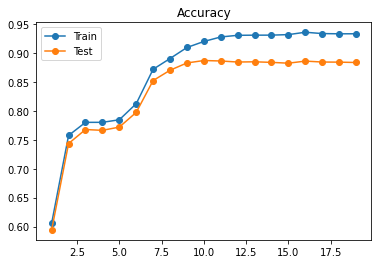

In [56]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_acc, '-o', label='Train')
pyplot.plot(values, test_acc, '-o', label='Test')
pyplot.legend()
pyplot.show()

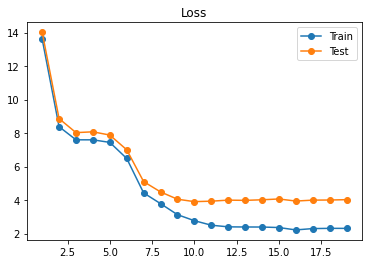

In [57]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.show()

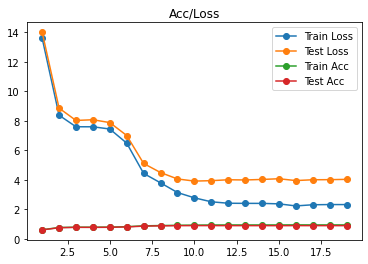

In [58]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Acc/Loss")
pyplot.plot(values, train_loss, '-o', label='Train Loss')
pyplot.plot(values, test_loss, '-o', label='Test Loss')
pyplot.plot(values, train_acc, '-o', label='Train Acc')
pyplot.plot(values, test_acc, '-o', label='Test Acc')
pyplot.legend()
pyplot.show()

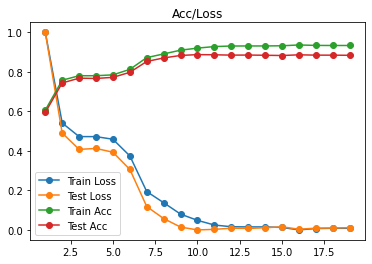

In [82]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Acc/Loss")
pyplot.plot(values, sc, '-o', label='Train Loss')
pyplot.plot(values, sec, '-o', label='Test Loss')
pyplot.plot(values, train_acc, '-o', label='Train Acc')
pyplot.plot(values, test_acc, '-o', label='Test Acc')
pyplot.legend()
pyplot.show()

In [ ]:
###ignore below here##

In [264]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=20)
lr.fit(X_train,y_train)
##max_iter is the number of epochs, so we change it to see which run is the most accurate

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=20)

In [270]:
from sklearn.metrics import accuracy_score, classification_report

In [266]:
y_predict = lr.predict(X_test)
##we will change this line when running to the test file after adjusting the max_iter

In [267]:
print('Logistic Regression Train accuracy %s' % lr.score(X_train, y_train)) #Train accuracy
print('Logistic Regression Test accuracy %s' % accuracy_score(y_predict, y_test)) #Test=Validation accuracy

Logistic Regression Train accuracy 0.93305
Logistic Regression Test accuracy 0.883


In [269]:
print(classification_report(y_test, y_predict)) #Classification Report

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2534
           1       0.87      0.89      0.88      2466

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

